In [1]:

solid = 'X<>||#?SQ'

all_levels = ['mario-1-1.txt_0',
              'mario-1-1.txt_1',
              'mario-1-1.txt_10',
              'mario-1-1.txt_11',
              'mario-1-1.txt_12',
              'mario-1-1.txt_13',
              'mario-1-1.txt_14',
              'mario-1-1.txt_15',
              'mario-1-1.txt_16',
              'mario-1-1.txt_17',
              'mario-1-1.txt_18',
              'mario-1-1.txt_19',
              'mario-1-1.txt_2',
              'mario-1-1.txt_20',
              'mario-1-1.txt_21',
              'mario-1-1.txt_22',
              'mario-1-1.txt_23',
              'mario-1-1.txt_24',
              'mario-1-1.txt_25',
              'mario-1-1.txt_26',
              'mario-1-1.txt_27',
              'mario-1-1.txt_28',
              'mario-1-1.txt_29',
              'mario-1-1.txt_3',
              'mario-1-1.txt_4',
              'mario-1-1.txt_5',
              'mario-1-1.txt_6',
              'mario-1-1.txt_7',
              'mario-1-1.txt_8',
              'mario-1-1.txt_9']

all_levels = ['./generated/rawAG.1']


In [2]:
all_levels = !ls generated/rawAG.*
import random
random.shuffle(all_levels)
all_levels = all_levels[:20]

In [18]:

jumps = []
falls = []


for filename in all_levels:

    #filename = 'SMB_TestData/' + filename
    level = []
    with open(filename) as infile:
        for line in infile:
            level.append(line.rstrip())
    level_ = list(reversed(level))
    width = len(level[0])
    height = len(level)

    start = None
    for x in range(width):
        previous_solid = False
        for y in range(height):
            if level_[y][x] == '*' and previous_solid:
                start = (x,y)
            elif level_[y][x] in solid:
                previous_solid = True
            else:
                previous_solid = False
            if start:
                break
        if start:
            break
    prev_y = start[1]
    prev_on_ground = True
    path_snippets = []
    last_location = start
    for x in range(start[0]+1,width):
        player_locations = []

        for y in range(height):
            if level_[y][x] == '*':
                player_locations.append((x,y))
                last_location = player_locations[-1]
        current_y = last_location[1]
        current_on_ground = level_[current_y-1][x] in solid


        if len(player_locations) > 1:
            if prev_on_ground and not current_on_ground:
                path_snippets.append((x-1,prev_y))
            path_snippets += player_locations
            prev_y = current_y
            prev_on_ground = current_on_ground

        elif current_on_ground and not prev_on_ground:
            path_snippets.append((x,current_y))
        elif prev_on_ground and not current_on_ground:
            path_snippets.append((x-1,prev_y))
            path_snippets.append((x,current_y))
        elif not prev_on_ground and not current_on_ground:
            path_snippets.append((x,current_y))
        prev_y = current_y
        prev_on_ground = current_on_ground


    px = -100
    py = -100
    falling = False
    snippet = []
    snippets = []
    for p in path_snippets:

        if p[0] - px > 1:
            if snippet:
                snippets.append(snippet)
            snippet = []
            falling = False
        if falling and p[1] > py:
            if snippet:
                snippets.append(snippet)
            snippet = []
            falling = False

        if snippet and p[1] < py:
            falling = True

        if level_[p[1]-1][p[0]] in solid:
            if snippet:
                snippets.append(snippet)
            snippet = []
            falling = False

        snippet.append(p)
        px = p[0]
        py = p[1]

    merged_snippets = []
    merge_with_next = []
    for snippet in snippets:
        if len(snippet) == 1:
            if len(merged_snippets) > 0:
                if abs(snippet[0][0] - merged_snippets[-1][-1][0]) <= 1:
                    merged_snippets[-1] += snippet
            merge_with_next = snippet
        else:
            merged_snippets.append(snippet )
            merge_with_next = []

    for snippet in merged_snippets:
        dy = 0
        prev = snippet[0]
        falling = False
        jump = []
        fall = []
        for pt in snippet:
            if pt[1] < py:
                falling = True
                fall.append(prev)
            if falling:
                fall.append(pt)
            else:
                jump.append(pt)
            py = pt[1]
            prev = pt
        jumps.append(jump)
        falls.append(fall)
    

In [19]:
jumps = [j for j in jumps if len(j) > 2]
falls = [j for j in falls if len(j) > 2]
print(jumps)

[[(33, 6), (34, 7), (34, 8), (35, 8), (35, 9), (36, 9)], [(56, 4), (57, 5), (57, 6), (58, 6), (58, 7), (59, 7), (59, 8), (60, 8)], [(64, 6), (65, 7), (65, 8), (66, 8), (66, 9), (67, 9), (67, 10), (68, 10)], [(82, 3), (83, 4), (83, 5), (84, 5), (84, 6), (85, 6), (85, 7), (86, 7)], [(93, 3), (94, 4), (94, 5), (95, 5), (95, 6), (96, 6), (96, 7), (97, 7)], [(123, 3), (124, 3), (125, 3), (126, 3)], [(143, 3), (144, 4), (144, 5), (145, 5)], [(153, 7), (154, 8), (154, 9), (155, 9), (155, 10), (156, 10)], [(177, 6), (178, 7), (178, 8), (179, 8), (179, 9), (180, 9), (181, 9), (182, 9)], [(192, 4), (193, 5), (193, 6), (194, 6), (194, 7), (195, 7)], [(212, 4), (213, 5), (213, 6), (214, 6), (214, 7), (215, 7)], [(222, 4), (223, 5), (223, 6), (224, 6), (224, 7), (225, 7)], [(227, 8), (228, 9), (228, 10), (229, 10)], [(231, 8), (232, 9), (233, 9)], [(240, 6), (241, 7), (241, 8), (242, 8), (242, 9), (243, 9), (243, 10), (244, 10)], [(250, 6), (251, 7), (251, 8), (252, 8), (252, 9), (253, 9), (253, 10

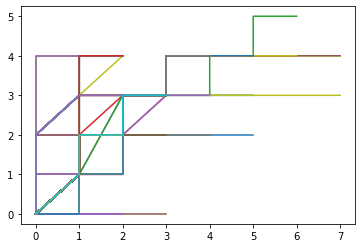

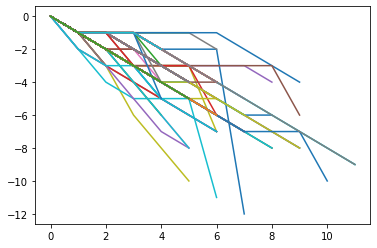

[[(36, 9), (37, 8), (37, 8), (38, 7)], [(38, 7), (39, 6), (40, 6), (40, 6), (41, 5), (41, 5), (42, 4), (42, 4), (43, 3)], [(60, 8), (61, 7), (61, 7), (62, 6)], [(68, 10), (69, 9), (69, 9), (70, 8), (70, 8), (71, 7), (71, 7), (72, 6)], [(72, 6), (73, 5), (73, 5), (74, 4), (74, 4), (75, 3)], [(87, 7), (88, 6), (89, 6), (89, 6), (90, 5), (90, 5), (91, 4), (91, 4), (92, 3)], [(98, 7), (99, 6), (100, 6), (100, 6), (101, 5), (101, 5), (102, 4), (102, 4), (103, 3)], [(145, 5), (146, 4), (146, 4), (147, 3)], [(156, 10), (157, 9), (157, 9), (158, 8), (158, 8), (159, 7), (160, 7), (161, 7), (161, 7), (162, 3)], [(182, 9), (183, 8), (183, 8), (184, 7), (184, 7), (185, 6), (185, 6), (186, 5), (186, 5), (187, 4)], [(206, 6), (207, 5), (207, 5), (208, 4)], [(215, 7), (216, 6), (216, 6), (217, 5), (217, 5), (218, 4)], [(229, 10), (230, 9), (230, 9), (231, 8)], [(236, 9), (237, 8), (237, 8), (238, 7), (238, 7), (239, 6)], [(244, 10), (245, 9), (246, 9), (246, 9), (247, 8), (247, 8), (248, 7), (248, 7)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

for snippet in jumps:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    plt.plot(path[:,0],path[:,1])
plt.show()

keep = []
for snippet in falls:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    if (path[:,1] > 0).any():
        pass
    else:
        keep.append(snippet)
        plt.plot(path[:,0],path[:,1])
plt.show()
falls = keep
print(keep)

In [21]:
import statsmodels.api as sm

[ 1.59915754 -0.16442692] [ 79.9429906  -27.31941607]


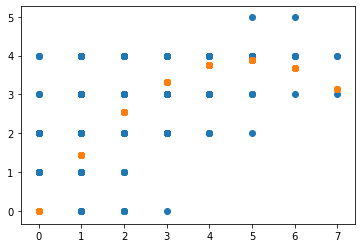

[-0.13836914] [-84.84688802]


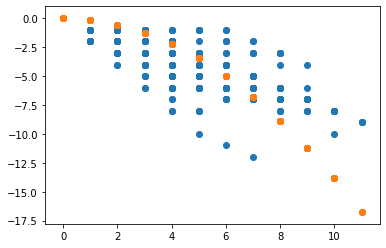

In [22]:
jump_data = []
for snippet in jumps:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    jump_data.append(path)
jump_data = np.vstack(jump_data)
jump_X = np.hstack([jump_data[:,0].reshape([-1,1]),jump_data[:,0].reshape([-1,1])**2])
jump_Y = jump_data[:,1].reshape([-1,1])

jump_model = sm.OLS(jump_Y,jump_X)
jump_results = jump_model.fit()
print(jump_results.params,jump_results.tvalues)
plt.scatter(jump_X[:,0],jump_Y)
plt.scatter(jump_X[:,0],np.dot(jump_X,jump_results.params))
plt.show()

fall_data = []
for snippet in falls:
    path = np.array(snippet)
    path[:,0] -= path[0,0]
    path[:,1] -= path[0,1]
    fall_data.append(path)
fall_data = np.vstack(fall_data)
fall_X = fall_data[:,0].reshape([-1,1])**2
fall_Y = fall_data[:,1].reshape([-1,1])

fall_model = sm.OLS(fall_Y,fall_X)
fall_results = fall_model.fit()
print(fall_results.params,fall_results.tvalues)
plt.scatter(fall_data[:,0],fall_Y)
plt.scatter(fall_data[:,0],np.dot(fall_X,fall_results.params))
plt.show()

In [ ]:
[ 1.52484667 -0.13711021] [ 55.78654899 -14.26547203]

[-0.13124125] [-104.18771382]

